# 1. import & Data Load

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('train.csv', index_col = ["PassengerId"])
test = pd.read_csv("test.csv", index_col=["PassengerId"])
survived = pd.read_csv("./gender_submission.csv", index_col="PassengerId") # 정답아님

# 2. 전처리

## 2.1 One Hot Encoding (Sex)

In [704]:
train.loc[train["Sex"] == "male", "Sex"] = 0 
train.loc[train["Sex"] == "female", "Sex"] = 1

In [705]:
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

## 2.2 One Hot Encoding (Embarked)

In [706]:
train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"
# train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

In [707]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"
# test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

## 2.3 Fare 결측치 처리

### <code> 2.1.1 Fare 중위값 처리</code>

In [665]:
def swap(x, i, j):
    x[i], x[j] = x[j], x[i]

def selectionSort(x):
    len(x)
    for size in reversed(range(len(x))):
        max_i = 0
        for i in range(1, 1+size):
            if x[i] > x[max_i]:
                max_i = i
        swap(x, max_i, size)

In [666]:
def getMedian(a):
    a_len = len(a)
    if (a_len == 0): return None
    a_center = int(a_len / 2)
    if (a_len % 2 == 1):
        return a[a_center]
    else:
        return (a[a_center - 1] + a[a_center]) / 2.0

In [667]:
train_median = train['Fare'].tolist()
train_median.sort()
train_median = getMedian(train_median)
print("Fare(Median) = ${0:.3f}".format(train_median))

Fare(Median) = $14.454


In [668]:
test_median = test['Fare'].tolist()
selectionSort(test_median)
test_median = getMedian(test_median)
print("Fare(Median) = ${0:.3f}".format(test_median))

Fare(Median) = $14.454


In [669]:
train.loc[pd.isnull(train["Fare"]), "Fare"] = train_median
train[pd.isnull(train["Fare"])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,


In [670]:
test.loc[pd.isnull(test["Fare"]), "Fare"] = test_median
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,


### <code> 2.1.2 Fare 평균값 처리</code>

In [688]:
mean_fare = train["Fare"].mean()
mean_fare2 = test["Fare"].mean()
print("Fare(Mean) = ${0:.3f}".format(mean_fare))
print("Fare(Mean) = ${0:.3f}".format(mean_fare2))

Fare(Mean) = $32.204
Fare(Mean) = $35.627


In [689]:
train.loc[pd.isnull(train["Fare"]), "Fare"] = mean_fare
train[pd.isnull(train["Fare"])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,


In [690]:
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare2
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,


### <code> 2.1.3 Fare 0으로 처리</code>

In [708]:
train.loc[pd.isnull(train["Fare"]), "Fare"] = 0
train[pd.isnull(train["Fare"])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,


In [709]:
test.loc[pd.isnull(test["Fare"]), "Fare"] = 0
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,


# 3. Feature 선택

In [710]:
feature_names = ["Pclass", "Sex", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]
X_train = train[feature_names]
# X_train.head()

In [711]:
X_test = test[feature_names]
# X_test.head()

In [712]:
label_name = "Survived"
y_train = train[label_name]
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [713]:
y_test = survived["Survived"].tolist()
# print(y_test)

In [714]:
del train["Embarked"]

In [715]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,True,False,False
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,True,False
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,True,False


# 랜덤 포레스트

In [546]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [522]:
estimator_grid = np.arange(1, 30, 3)
depth_grid = np.arange(1, 10, 2)
parameters = {'n_estimators': estimator_grid, 'max_depth': depth_grid}
gridCV = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10)
gridCV.fit(X_train, y_train)
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']

In [523]:
print("Random Forest best n estimator : " + str(best_n_estim))
print("Random Forest best depth : " + str(best_depth))

Random Forest best n estimator : 25
Random Forest best depth : 5


In [524]:
RF_best = RandomForestClassifier(n_estimators=best_n_estim, max_depth=best_depth,random_state=3)
RF_best.fit(X_train, y_train);
y_pred = RF_best.predict(X_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

Random Forest best accuracy : 0.926


In [525]:
del survived["Survived"]

In [526]:
survived["Survived"] = y_pred

In [527]:
survived.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [528]:
pd.DataFrame.to_csv(survived,"./predict_result.csv",sep=',', mode='w')

In [377]:
# del survived['Survived']
# del survived['PassengerId']

In [383]:
survived['survived_pred'] = predict_result
survived.head()

,Survived,survived_pred
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1


In [397]:
TP = 0; FP = 0; TN = 0; FN = 0
for i in range(len(survived['survived_pred'])):
    if survived['survived_pred'][i] == survived['Survived'][i] and survived['Survived'][i] == 1:
        TP += 1
    elif survived['survived_pred'][i] == survived['Survived'][i] and survived['Survived'][i] == 0:
        TN += 1
    elif survived['survived_pred'][i] != survived['Survived'][i] and survived['Survived'][i] == 1:
        FP += 1
    else:
        FN += 1
print("TP : ", TP)
print("FP : ", FP)
print("TN : ", TN)
print("FN : ", FN)

TP :  128
FP :  24
TN :  264
FN :  2


In [ ]:
# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# false_alarm = FP / (FP+TN)
# print(precision)
# print(recall)
# print(false_alarm)

In [111]:
acc = (TP+TN)/(TP+TN+FP+FN)
tpr = TP/(TP+FN)
tnr = TN/(TN+FP)

print("정확도 : ", acc)
print("민감도 : ", tpr)
print("특이도 : ", tnr)

정확도 :  0.937799043062201
민감도 :  0.9846153846153847
특이도 :  0.9166666666666666


# 의사결정트리

In [596]:
from sklearn.tree import DecisionTreeClassifier
seed = 37

In [597]:
depth_grid = np.arange(2,31,2)
parameters = {'max_depth':depth_grid}
gridCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10)
gridCV.fit(X_train, y_train);
best_depth = gridCV.best_params_['max_depth']

In [598]:
print("Tree best depth : " + str(best_depth))

Tree best depth : 10


In [599]:
model = DecisionTreeClassifier(max_depth=best_depth,
                               random_state=seed)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=37,
            splitter='best')

In [600]:
Y_pred = model.predict(X_test)
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

Tree best accuracy : 0.89


In [601]:
del survived["Survived"]
survived["Survived"] = Y_pred
pd.DataFrame.to_csv(survived,"./predict_result.csv",sep=',', mode='w')

In [43]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="./decision-tree.dot")

In [14]:
# with open("./decision-tree.dot") as f:
#     dot_graph = f.read()

# graphviz.Source(dot_graph)

In [402]:
# X_train.head()
# test.head()

In [149]:
X_test = test[feature_names]
prediction = model.predict(X_test)
submission = pd.read_csv("./gender_submission.csv", index_col="PassengerId")
# submission["Survived"] = prediction
print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [150]:
del df2["Survived"]

In [151]:
a = submission["Survived"].tolist()
df2 = pd.DataFrame(a, columns=["Survived"])

In [153]:
df2["Survived_pred"] = Y_pred

In [154]:
df2.head(10)

,Survived,Survived_pred
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


In [138]:
TP = 0; FP = 0; TN = 0; FN = 0
for i in range(len(df["Survived"])):
    if df["Survived"][i] == survived['Survived'][i] and survived['Survived'][i] == 1:
        TP += 1
    elif df["Survived"][i] == survived['Survived'][i] and survived['Survived'][i] == 0:
        TN += 1
    elif df["Survived"][i] != survived['Survived'][i] and survived['Survived'][i] == 1:
        FP += 1
    else:
        FN += 1
print("TP : ", TP)
print("FP : ", FP)
print("TN : ", TN)
print("FN : ", FN)

TP :  127
FP :  25
TN :  266
FN :  0


In [140]:
acc = (TP+TN)/(TP+TN+FP+FN)
tpr = TP/(TP+FN)
tnr = TN/(TN+FP)

print("정확도 : ", acc)
print("민감도 : ", tpr)
print("특이도 : ", tnr)

정확도 :  0.9401913875598086
민감도 :  1.0
특이도 :  0.9140893470790378


# Logistic Regression

In [716]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [717]:
def import_data():
    # import total dataset
    data = pd.read_csv('train.csv')

    # get a list of column names
    headers = list(data.columns.values)

    # separate into independent and dependent variables
    x = data[headers[:-1]]
    y = data[headers[-1:]].values.ravel()
    return x, y

In [718]:
glm = LogisticRegression()
glm.fit(X_train,y_train)
Y_pred_train = glm.predict(X_train)
Y_pred_test = glm.predict(X_test)

In [719]:
conf_mat = metrics.confusion_matrix(y_test,Y_pred_test)
print(conf_mat)

[[238  28]
 [  0 152]]


In [720]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
print('Accuracy    = '+ str(np.round(accuracy,2)))
print('Sensitvity  = '+ str(np.round(sensitivity,2)))
print('Specificity = '+ str(np.round(specificity,2)))

Accuracy    = 0.93
Sensitvity  = 1.0
Specificity = 0.89


In [721]:
del survived["Survived"]
survived["Survived"] = Y_pred_test
pd.DataFrame.to_csv(survived,"./predict_result.csv",sep=',', mode='w')

---------------------

In [1]:
print(round(0.09))

0


In [20]:
np.corrcoef(train['Pclass'], train['Survived'])
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [31]:
# df = pd.DataFrame(train, columns = ['Survived', 'SibSp', 'Parch'])
# df

In [21]:
train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [22]:
train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

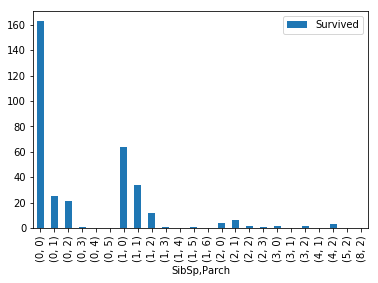

In [10]:
piv_pd = pd.pivot_table(df, index=["SibSp", "Parch"], values=["SibSp"], aggfunc=np.sum)
pd.DataFrame(df.groupby('Survived')['SibSp'].sum())
piv_pd.plot(kind='bar')
plt.show()